In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import time
from math import pi
import matplotlib.pyplot as plt

Following the order of [Spatiotemporal Tiling of the Kuramoto-Sivashinsky Equation](#thesis), the next process that was developed after the ability to find periodic orbits was to clip out smaller domains and use them to find "fundamental periodic orbits". These are the smallest periodic orbits which serve as building blocks for all other solutions.


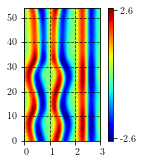

In [2]:
# small vanity rotation
orbit_ = read_h5('OrbitKS_T54p129_L26p744.h5', directory='../data/examples/').rotate(0.1, axis=1)
orbit_.plot()

The structure defined approximately on $t \in [0, 35], \forall x$ looks to repeat twice. Therefore this is the target of the clipping. Again, I want to stress that this iterative manner of clipping is **unnecessary**, but it was how this calculation was originally performed. Orbithunter's utility again shines here via the function 'clip'. 

I then clip out the subdomain, clipping automatically calculates the corresponding field, discretization, parameters.


Starting lstsq. Initial residual=5.944333616757563, target=3.2e-07
####
Tolerance threshold met. Exiting with residual 9.928856453166817e-14


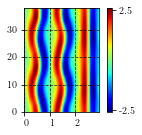

In [12]:
first_clipping = rediscretize(clip(rediscretize(orbit_, new_shape=(512,512)), ((0., 35), (None, None))), new_shape=(16,20))
first_orbit = converge(first_clipping,  method='lstsq', verbose=True, ftol=0).orbit
first_orbit.plot()


Starting lstsq. Initial residual=0.03282016822764021, target=3.2e-07
##
Tolerance threshold met. Exiting with residual 2.6810066519342066e-13


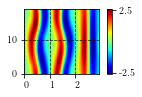

In [21]:
second_clipping = rediscretize(clip(rediscretize(first_orbit, new_shape=(512,512)), ((0., 20), (None, None))), new_shape=(16,20))
second_orbit = converge(second_clipping, method='lstsq', verbose=True, ftol=0).orbit
second_orbit.plot()


Starting lstsq. Initial residual=15633.435190111735, target=5.12e-07
####
Tolerance threshold met. Exiting with residual 2.697095680745047e-07


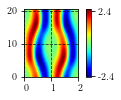

In [9]:
third_clipping = rediscretize(clip(rediscretize(second_orbit,new_shape=(512,512)), ((None, None), (0, 2.1))))
third_orbit = converge(third_clipping, method='lstsq', verbose=True, ftol=0).orbit
third_orbit.plot()

For this demonstration, I will use the very first orbit and clipping method I ever applied, which was an iterative procedure to find (converge) a sequence of progressively smaller orbits.


Starting lstsq. Initial residual=0.032248320850457535, target=5.12e-07
#
Tolerance threshold met. Exiting with residual 1.7416813079534328e-15


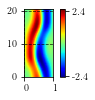

In [11]:
antisymmetric_clipping = convert_class(third_orbit, AntisymmetricOrbitKS)
third_orbit = converge(antisymmetric_clipping, method='lstsq', verbose=True, ftol=0).orbit
third_orbit.plot()

Going by the residual the clipping does indeed exist in the antisymmetric subspace!

In [12]:
int1 = kse_integrate(OrbitKS(seed=0, parameters=(512, 512), M=1024), verbose=True, integration_time=1000, step_size=0.25)

Integration progress [##############

KeyboardInterrupt: 

In [ ]:
int1.plot(figsize=(10,30))

In [ ]:
masked_field = mask_orbit(int1, ((320,350), (18, 20)), mask_region='interior')
masked_field.plot()

In [ ]:
masked_field = mask_orbit(int1, ((320,350), (18, 20)), mask_region='exterior')
masked_field.plot()

In [ ]:
clipping = rediscretize(clip(int1,((320,350), (18, 20)), clipping_class=RelativeOrbitKS, 
                zero_shift=True, frame='physical').change_reference_frame(to='comoving'))

In [ ]:
clipping = rediscretize(clip(int1,((320,350), (18, 20))))

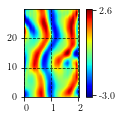

In [21]:
clipping.plot(fundamental_domain=False)

In [63]:
clipping_result = converge(rediscretize(clipping), method='hybrid', verbose=True, preconditioning=False)

Starting gradient descent. Initial residual=12417.422996632957, target=4.800000000000001e-07, max_iter=10752
#################################################
 Residual=10.0135332 after 5000 gradient descent iterations. Current parameter values:(30.060846450343348, 18.826297843203932, 0)
#################################################
 Residual=7.3007159 after 10000 gradient descent iterations. Current parameter values:(30.1507509027924, 18.863022833270275, 0)
#######
Starting lstsq. Initial residual=7.045814512365928, target=4.800000000000001e-07
######################### Residual=1.0231455 after 25 lstsq iterations
######################### Residual=0.7194519 after 50 lstsq iterations
######################### Residual=0.6301361 after 75 lstsq iterations
######################### Residual=0.5678681 after 100 lstsq iterations
##########
Insufficient residual decrease. Exiting with residual 0.5471549032930297


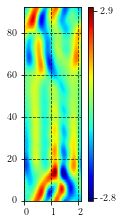

In [64]:
clipping_result.orbit.plot()

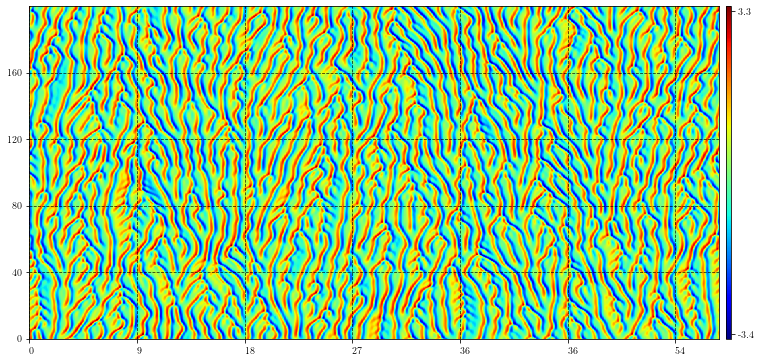

In [52]:
large_clipping = clip(int1, ((300, 500),(None, None)))
large_clipping.plot(fundamental_domain=False)

In [53]:
optimized_clipping = converge(rediscretize(large_clipping, new_shape=(128, 512)),
                                    verbose=True, orbit_maxiter=1000, preconditioning=False).orbit

Starting gradient descent. Initial residual=1594.63344808166, target=6.5536e-05, max_iter=1000
##########
Failed to converge. Maximum number of iterations reached. exiting with residual 406.3113590932987


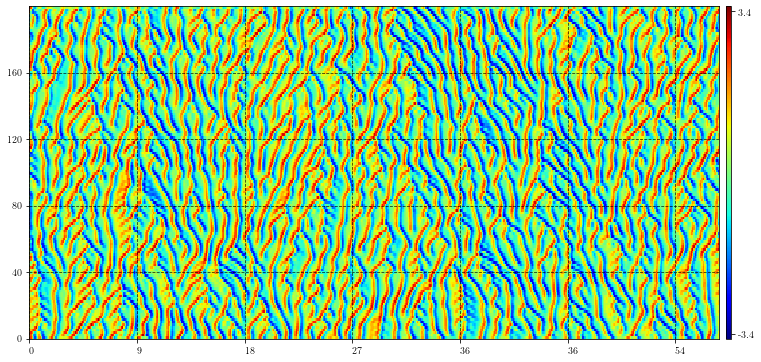

In [58]:
optimized_clipping.plot(padding=False)

In [55]:
optimized_clipping = converge(rediscretize(large_clipping, new_shape=(128, 512)), 
                                    verbose=True, orbit_maxiter=1000, preconditioning=True).orbit

Starting gradient descent. Initial residual=1594.63344808166, target=6.5536e-05, max_iter=1000
##########
Failed to converge. Maximum number of iterations reached. exiting with residual 415.05257290424254


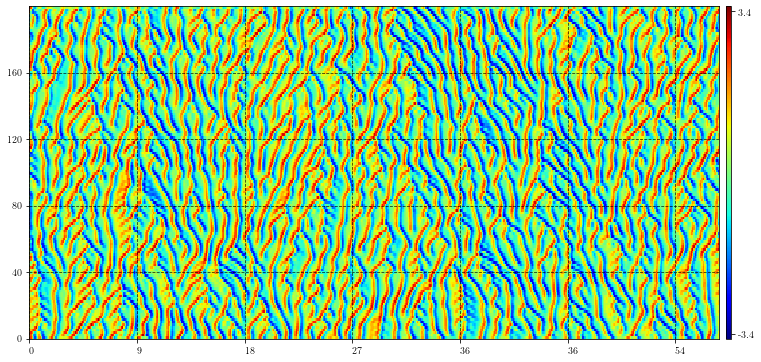

In [56]:
optimized_clipping.plot(padding=False)

In [ ]:
optimized_clipping = converge(medium_clipping, verbose=True, ftol=1e-4, orbit_maxiter=100000, preconditioning=False)

In [ ]:
optimized_clipping.orbit.plot(padding=True)

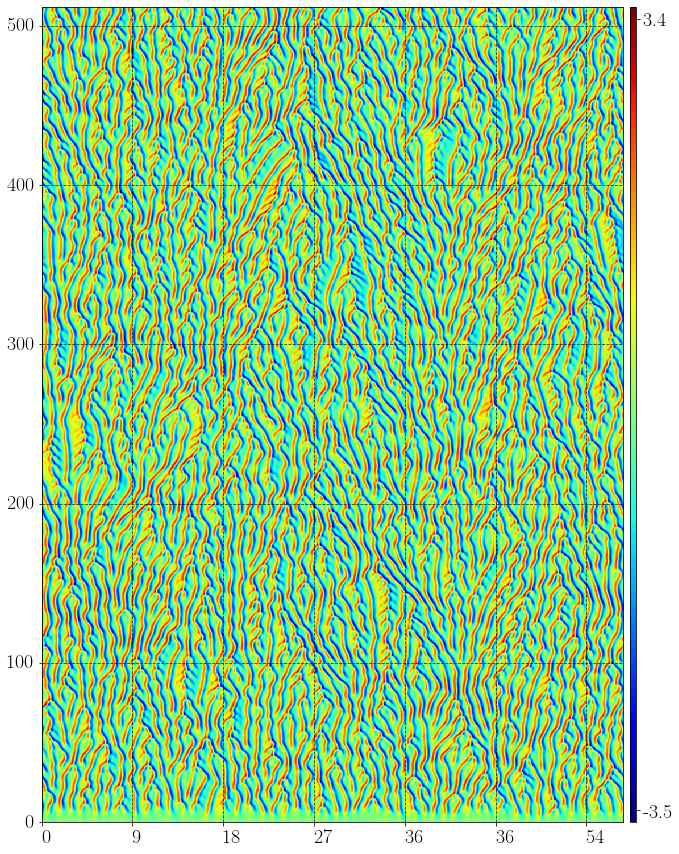

In [18]:
int1.plot(figsize=(10,30))

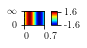

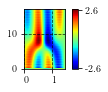

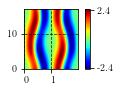

In [19]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks()
td[0].plot()
td[1].plot()
td[2].plot()
td = rediscretize_tiling_dictionary(td, new_shape=(128,32))

In [20]:
td[1].L / td[1].M

0.40686143374013595

In [21]:
int1.L / int1.M

0.5

In [22]:
td[1].T / td[1].N

0.1339545900982726

In [23]:
int1.T / int1.N

0.1279680079980005

In [24]:
int1.T / td[1].T

29.860865514690428

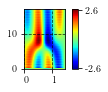

In [25]:
td[1].plot()

In [26]:
td

{0: OrbitKS({"basis": "field", "parameters": ["0.0", "6.3906", "0"], "field_shape": ["128", "32"]}),
 1: OrbitKS({"basis": "field", "parameters": ["17.1462", "13.0196", "0"], "field_shape": ["128", "32"]}),
 2: OrbitKS({"basis": "field", "parameters": ["17.1462", "17.5907", "0"], "field_shape": ["128", "32"]})}

In [27]:
np.roll(int1.state, int1.M, axis=1) - int1.state

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
int2 = rediscretize(int1, new_shape=(2048,2048))

In [29]:
merger= rediscretize(td[1], new_shape=(64,64))

In [30]:
merger

OrbitKS({"basis": "field", "parameters": ["17.1462", "13.0196", "0"], "field_shape": ["64", "64"]})

In [31]:
merger.L / merger.M

0.20343071687006797

In [32]:
int2.T / 2048

0.25

In [33]:
int2.L / 2048

0.25

In [34]:
norms = np.zeros([int2.N-merger.N, int2.M-merger.M])
intstate = int2.state
mergerstate = merger.state
for n in range(int2.N-merger.N):
    if np.mod(n, (int2.N-merger.N)//10) == 0:
        print('#', end='')
    for m in range(int2.M-merger.M):
        norms[n, m] = intstate[n:n+merger.N, m:m+merger.M].ravel().dot(mergerstate.ravel())

###########

In [35]:
import pandas as pd

In [36]:
np.where(norms < 90)

(array([   0,    0,    0, ..., 1983, 1983, 1983], dtype=int64),
 array([   0,    1,    2, ..., 1981, 1982, 1983], dtype=int64))

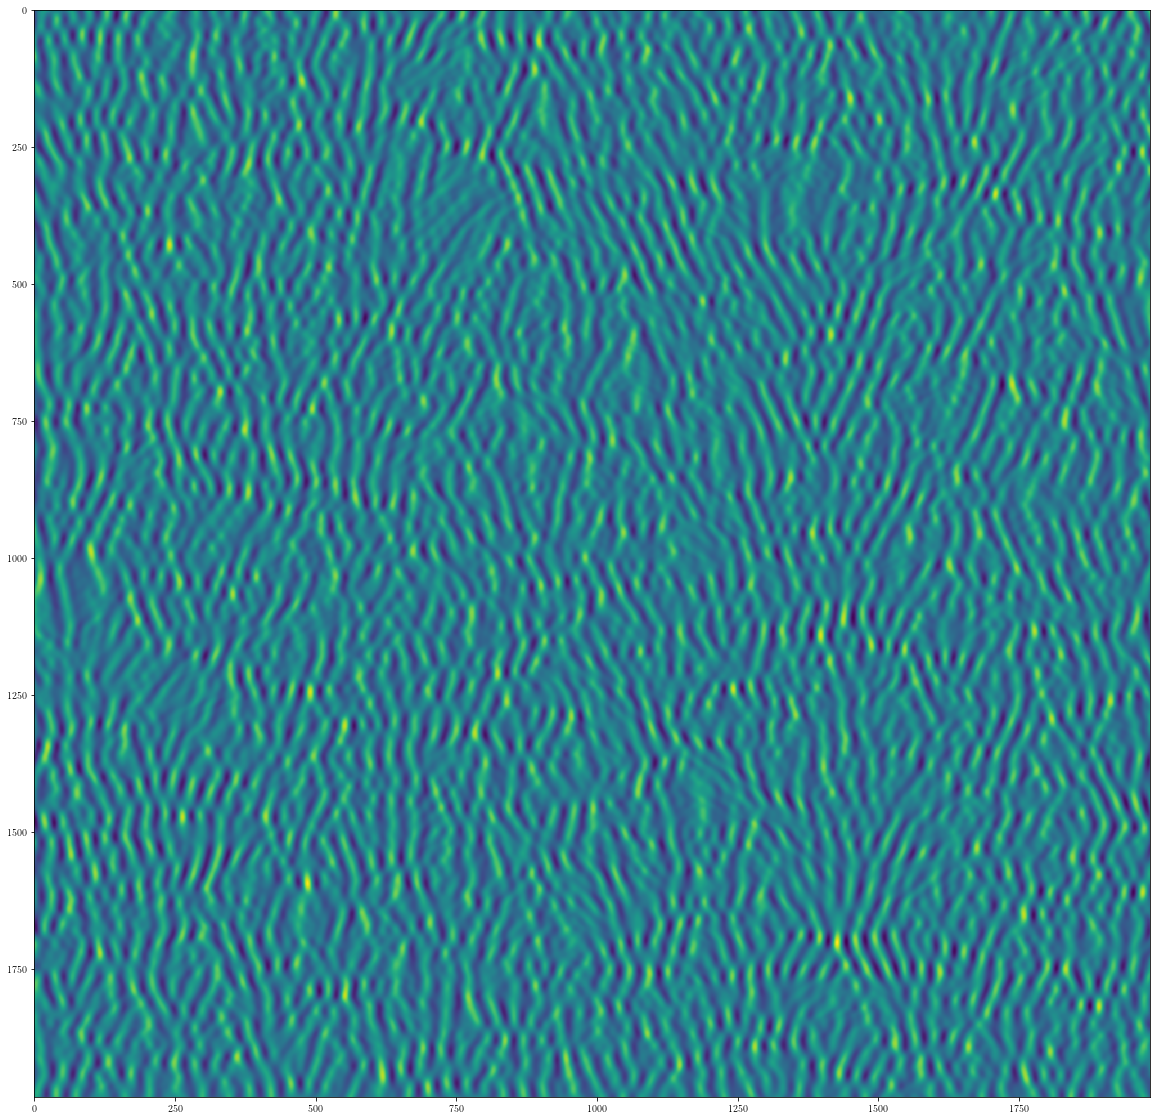

In [37]:
fig = plt.figure(figsize=(20,20))
_ = plt.imshow(norms, interpolation='none', aspect='auto')
_ = plt.show()

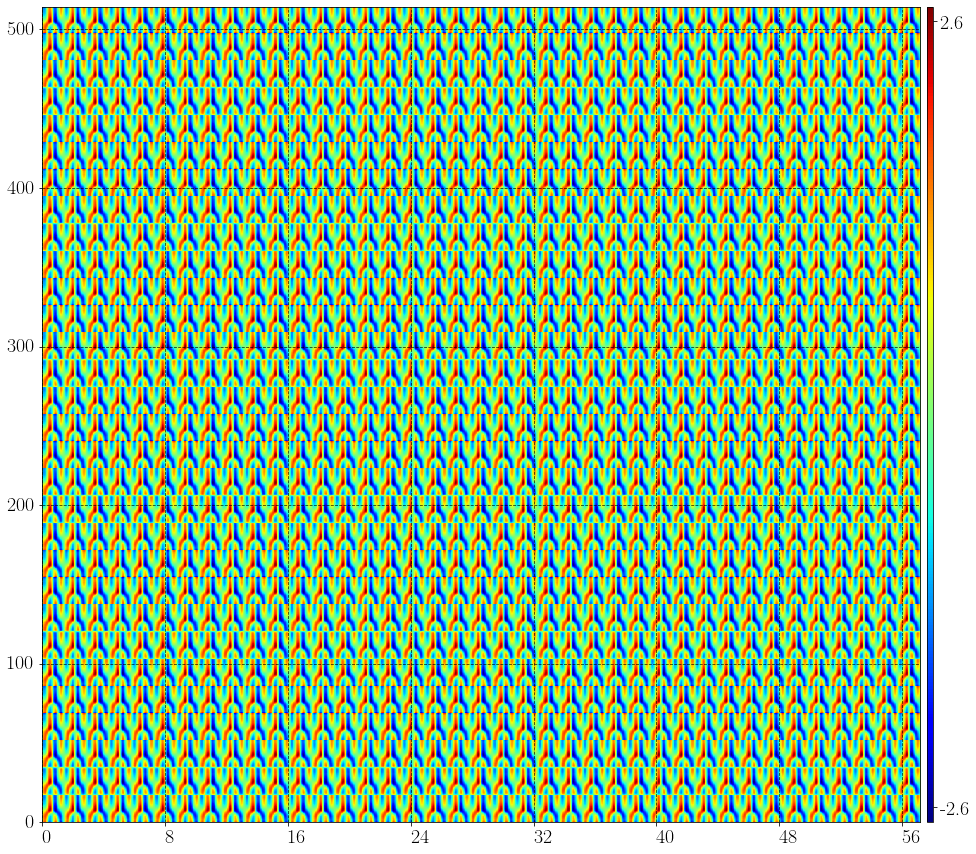

In [40]:
symbol_array = np.ones([30,39])
tiled_orbit = tile(symbol_array, td, OrbitKS, stripwise=False)
tiled_orbit.plot(figsize=(25,25))

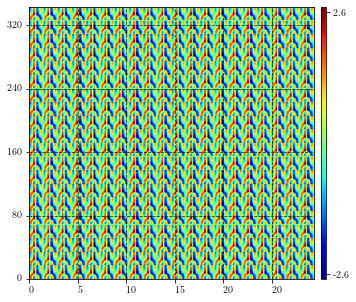

In [41]:
symbol_array = np.ones([20,20])
tiled_orbit = tile(symbol_array, td, OrbitKS, stripwise=True)
tiled_orbit.plot(figsize=(5,5))

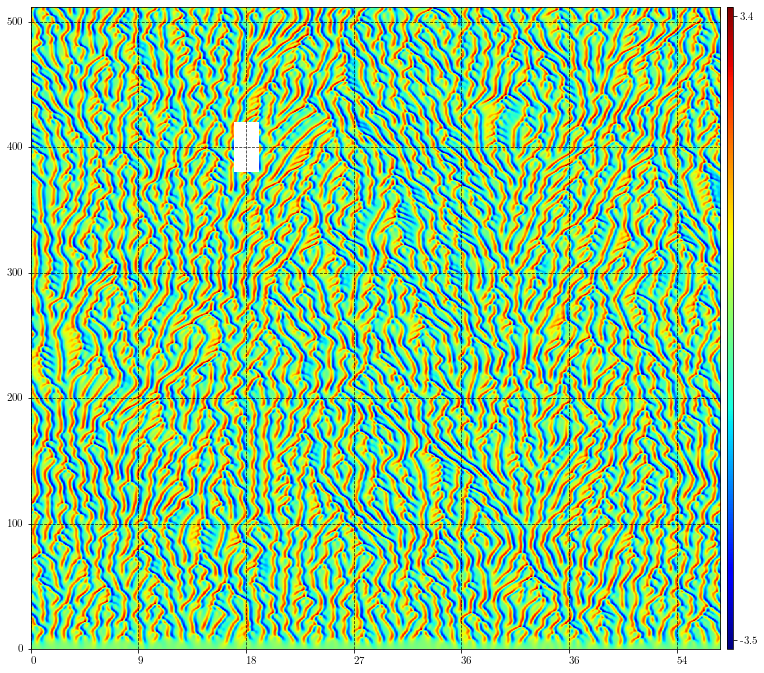

In [42]:
masked_field = mask_orbit(int1, ((380,420), (17,19)), mask_region='interior')
masked_field.plot()

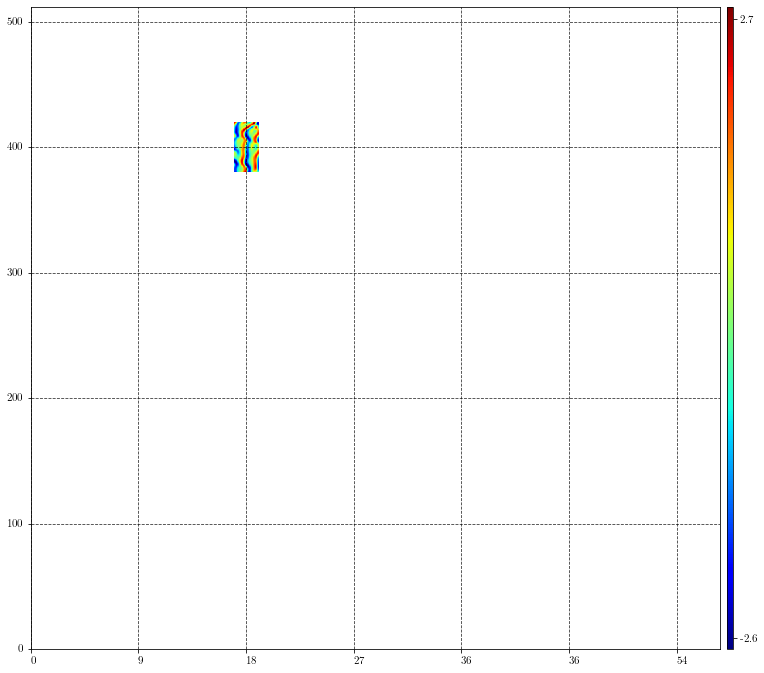

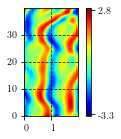

KeyboardInterrupt: 

In [ ]:
clipping_result.orbit.residual()

In [ ]:
clipping_result.orbit.plot()

In [ ]:
orbit_.plot()